# INTRO

In [1]:
%matplotlib inline

# ML TASKS

![](./img/ai_ml_dl_rl.png)

## ML PROJECT WORKFLOW

### DATA PREPARATION

![](./img/proj_workflow_dataprep.jpg)

### MODEL TRAINING

![](./img/proj_workflow_train_vl_model.png)

---

## Datasets
scikit-learn comes with a few standard datasets, for instance the iris and digits datasets for classification and the diabetes dataset for regression.

In [2]:
import pandas as pd
import numpy as np

In [3]:
from sklearn import datasets
iris = datasets.load_iris() # https://scikit-learn.org/stable/datasets/toy_dataset.html#iris-plants-dataset
# diabetes = datasets.load_diabetes()

In [4]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
iris_df["target_num"] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_num
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_df["target_class"] = iris_df["target_num"].apply(lambda x: iris.target_names[x])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target_num,target_class
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


## Model selection

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = iris_df[iris.feature_names]
y = iris_df["target_class"]

In [9]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: target_class, dtype: object

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=42) 

In [12]:
X.shape, y.shape

((150, 4), (150,))

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

## Preprocessing (Transformers)

In [14]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder # transformers for labels (y)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder # transformers for features (X)

In [15]:
le = LabelEncoder()

y_train_le = pd.Series(le.fit_transform(y_train), index=y_train.index)

y_test_le = pd.Series(le.transform(y_test), index=y_test.index)
y_train_le.shape, y_test_le.shape

((105,), (45,))

In [16]:
y_train[:10]

81     versicolor
133     virginica
137     virginica
75     versicolor
109     virginica
96     versicolor
105     virginica
66     versicolor
0          setosa
122     virginica
Name: target_class, dtype: object

In [17]:
y_train_le[:10]

81     1
133    2
137    2
75     1
109    2
96     1
105    2
66     1
0      0
122    2
dtype: int32

In [18]:
ss = StandardScaler()
ss.fit(X_train)
X_train_ss = pd.DataFrame(ss.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_ss = pd.DataFrame(ss.transform(X_test), columns=X_test.columns, index=X_test.index)

X_train.shape, X_train_ss.shape, X_test.shape, X_test_ss.shape

((105, 4), (105, 4), (45, 4), (45, 4))

In [19]:
X_train[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,5.5,2.4,3.7,1.0
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
75,6.6,3.0,4.4,1.4
109,7.2,3.6,6.1,2.5
96,5.7,2.9,4.2,1.3
105,7.6,3.0,6.6,2.1
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
122,7.7,2.8,6.7,2.0


In [20]:
X_train_ss[:10]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
81,-0.413416,-1.462003,-0.099511,-0.323398
133,0.551222,-0.502563,0.717703,0.353032
137,0.671802,0.217016,0.951192,0.758890
75,0.912961,-0.022844,0.309096,0.217746
109,1.636440,1.416315,1.301427,1.705891
96,-0.172257,-0.262704,0.192351,0.082460
105,2.118759,-0.022844,1.593289,1.164747
66,-0.292837,-0.022844,0.367468,0.353032
0,-0.895736,1.176455,-1.442076,-1.405685
122,2.239339,-0.502563,1.651661,1.029461


## Estimators

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [22]:
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf

DecisionTreeClassifier(max_depth=2, random_state=42)

In [23]:
%%time
clf.fit(X_train, y_train)

Wall time: 4 ms


DecisionTreeClassifier(max_depth=2, random_state=42)

In [24]:
y_pred = clf.predict(X_test)
X_test.shape, y_pred.shape

((45, 4), (45,))

In [25]:
y_pred[:10]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'virginica',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [26]:
y_test[:10].values

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

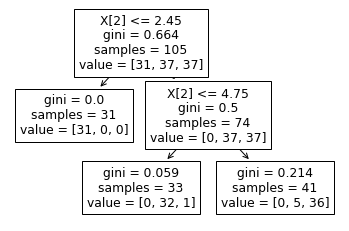

In [27]:
from matplotlib import pyplot as plt

plot_tree(clf)
plt.show()

In [28]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier # estimator

In [29]:
ovr_clf = OneVsRestClassifier(estimator=SVC(random_state=42))

In [30]:
%%time
ovr_clf.fit(X_train_ss, y_train_le)

Wall time: 20 ms


OneVsRestClassifier(estimator=SVC(random_state=42))

In [31]:
y_pred_ovr = ovr_clf.predict(X_test_ss)
y_test_le.shape, y_pred_ovr.shape

((45,), (45,))

In [32]:
y_test_le[:10].values

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

In [33]:
y_pred_ovr[:10]

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1])

## Metrics

In [34]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [35]:
cm = confusion_matrix(y_test.values, y_pred)
cm

array([[19,  0,  0],
       [ 0, 12,  1],
       [ 0,  0, 13]], dtype=int64)

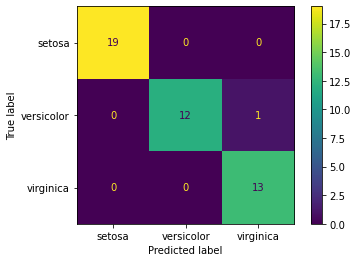

In [36]:
ConfusionMatrixDisplay(cm, display_labels=clf.classes_).plot()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [38]:
confusion_matrix(y_test_le, y_pred_ovr)

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

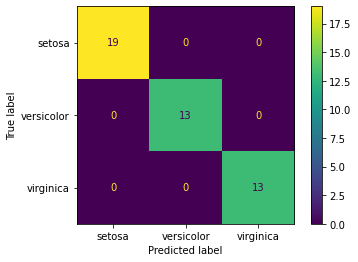

In [39]:
ConfusionMatrixDisplay(confusion_matrix(y_test_le, y_pred_ovr), display_labels=clf.classes_).plot()

## Pipeline

In [40]:
from sklearn.pipeline import Pipeline

# Define a Standard Scaler to normalize inputs
scaler = StandardScaler()

# set the tolerance to a large value to make the example faster
clf = OneVsRestClassifier(estimator=SVC(random_state=42))
pipe = Pipeline(steps=[("scaler", scaler), ("ovr_classifier", clf)])

In [41]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('ovr_classifier',
                 OneVsRestClassifier(estimator=SVC(random_state=42)))])

In [42]:
y_pred_pipe = pipe.predict(X_test)

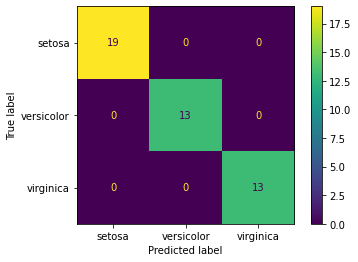

In [43]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_pipe), display_labels=clf.classes_).plot()